# **CrisisTrend Analyzer**

**CrisisTrend Analyzer** is a data-driven project aimed at studying global disaster events recorded between **2018-01-01 to 2024-12-31**. By exploring the dataset “global_disaster_response_2018_2024.csv”, this project conducts an in-depth analysis of disaster occurrences, severity levels, affected regions, human loss, economic damage, and response performance across multiple years.The goal of this project is to identify trends, impacts, and response patterns that support better disaster management and preparedness.

#### Import the necessary libraries



In [1]:
# remove the warning massage
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#### Import dataset

In [2]:
df=pd.read_csv("C:\DataScience\Dataset\CSV\global_disaster_response_2018_2024.csv")

#### Display the first 5 rows of the dataset

In [3]:
print(df.head())

         date        country disaster_type  severity_index  casualties  \
0   1/31/2021         Brazil    Earthquake            5.99         111   
1  12/23/2018         Brazil  Extreme Heat            6.53         100   
2   8/10/2020          India     Hurricane            1.55          22   
3   9/15/2022      Indonesia  Extreme Heat            4.55          94   
4   9/28/2022  United States      Wildfire            3.80          64   

   economic_loss_usd  response_time_hours  aid_amount_usd  \
0         7934365.71                15.62       271603.79   
1         8307648.99                 5.03       265873.81   
2          765136.99                32.54        49356.49   
3         1308251.31                 7.83       237512.88   
4         2655864.36                21.90       188910.69   

   response_efficiency_score  recovery_days  latitude  longitude  
0                      83.21             67   -30.613   -122.557  
1                      96.18             55    10.859 

#### Display the last 5 rows of the dataset

In [4]:
print(df.tail())

             date        country disaster_type  severity_index  casualties  \
49995   5/14/2019          Chile     Landslide            5.50          78   
49996  10/30/2020  United States      Wildfire            7.76         165   
49997   4/27/2019         Turkey         Flood            4.90         130   
49998   10/9/2022         Greece   Storm Surge            3.35          82   
49999   1/12/2023   South Africa       Drought            5.03         129   

       economic_loss_usd  response_time_hours  aid_amount_usd  \
49995         3711240.93                 8.45       305020.35   
49996        12072842.65                 1.00       363881.25   
49997         1805859.70                 5.14       280665.61   
49998         3176085.56                19.22        80331.23   
49999         2933495.70                 9.08       354096.99   

       response_efficiency_score  recovery_days  latitude  longitude  
49995                      94.27             55    12.976    -25.680 

#### Checking the data types

In [5]:
print(df.dtypes)

date                          object
country                       object
disaster_type                 object
severity_index               float64
casualties                     int64
economic_loss_usd            float64
response_time_hours          float64
aid_amount_usd               float64
response_efficiency_score    float64
recovery_days                  int64
latitude                     float64
longitude                    float64
dtype: object


#### Describing the data

In [6]:
print(df.describe())

       severity_index    casualties  economic_loss_usd  response_time_hours  \
count    50000.000000  50000.000000       5.000000e+04         50000.000000   
mean         5.015769    100.591140       5.068593e+06            12.183027   
std          1.942843     65.052064       3.268541e+06             9.259081   
min          1.000000      0.000000       5.273900e+02             1.000000   
25%          3.660000     51.000000       2.585513e+06             6.270000   
50%          4.990000     91.000000       4.548351e+06            10.510000   
75%          6.340000    138.000000       6.950615e+06            15.450000   
max         10.000000    524.000000       2.445624e+07            63.100000   

       aid_amount_usd  response_efficiency_score  recovery_days      latitude  \
count    5.000000e+04               50000.000000   50000.000000  50000.000000   
mean     2.500003e+05                  87.574025      49.682560      0.231205   
std      1.432275e+05                  10.188

#### Info about the data


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       50000 non-null  object 
 1   country                    50000 non-null  object 
 2   disaster_type              50000 non-null  object 
 3   severity_index             50000 non-null  float64
 4   casualties                 50000 non-null  int64  
 5   economic_loss_usd          50000 non-null  float64
 6   response_time_hours        50000 non-null  float64
 7   aid_amount_usd             50000 non-null  float64
 8   response_efficiency_score  50000 non-null  float64
 9   recovery_days              50000 non-null  int64  
 10  latitude                   50000 non-null  float64
 11  longitude                  50000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.6+ MB
None


#### Checking for Duplicates

In [8]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool


#### Column names

In [9]:
print(df.columns)

Index(['date', 'country', 'disaster_type', 'severity_index', 'casualties',
       'economic_loss_usd', 'response_time_hours', 'aid_amount_usd',
       'response_efficiency_score', 'recovery_days', 'latitude', 'longitude'],
      dtype='object')


#### Shape of the Dataset

In [10]:
df_cleaned = df.dropna()

print("Original shape: ",df.shape)
print("New shape after removing nulls: ",df_cleaned.shape)

Original shape:  (50000, 12)
New shape after removing nulls:  (50000, 12)


### **DATA CLEANING AND PROCESSING**

#### Renaming the columns

In [11]:
df.rename(columns={
    "date":"Date",
    "country":"Country",
    "disaster_type":"Disaster_Type",
    "severity_index":"Severity_Index",
    "casualties":"Casualties",
    "economic_loss_usd":"Economic_Loss",
    "response_time_hours":"Response_Time_Hours",
    "aid_amount_usd":"Aid_Amount",
    "response_efficiency_score":"Response_Efficiency_Score",
    "recovery_days":"Recovery_Days",
    "latitude":"Latitude",
    "longitude":"Longitude"
},inplace=True)
print(df.columns)

Index(['Date', 'Country', 'Disaster_Type', 'Severity_Index', 'Casualties',
       'Economic_Loss', 'Response_Time_Hours', 'Aid_Amount',
       'Response_Efficiency_Score', 'Recovery_Days', 'Latitude', 'Longitude'],
      dtype='object')


#### Checking for negative amount/zero amount

In [12]:
# Check for non-positive values in monetary columns
monetary_cols = ['Economic_Loss', 'Aid_Amount']

print("--- Check for Non-Positive Monetary Values ---")

for col in monetary_cols:
    non_positive_count = (df[col] <= 0).sum()
    print(f"Number of non-positive values in '{col}': {non_positive_count}")


if (df[monetary_cols] <= 0).any().any():
    print("\nAction Required: Non-positive values found. Consider imputation or removal before currency conversion.")
else:
    print("\nResult: All monetary values are positive. Proceed with currency conversion.")

--- Check for Non-Positive Monetary Values ---
Number of non-positive values in 'Economic_Loss': 0
Number of non-positive values in 'Aid_Amount': 0

Result: All monetary values are positive. Proceed with currency conversion.


#### Converting money value from DOLLAR($) TO INR(₹)

In [13]:
#Converting  Economic_Loss & Aid_Amount Column from  DOALLAR TO INR
df['Economic_Loss'] = df['Economic_Loss'].astype(float) * 83
df['Aid_Amount'] = df['Aid_Amount'].astype(float) * 83

print(df.dtypes)
print('\n')
print(df.head())

Date                          object
Country                       object
Disaster_Type                 object
Severity_Index               float64
Casualties                     int64
Economic_Loss                float64
Response_Time_Hours          float64
Aid_Amount                   float64
Response_Efficiency_Score    float64
Recovery_Days                  int64
Latitude                     float64
Longitude                    float64
dtype: object


         Date        Country Disaster_Type  Severity_Index  Casualties  \
0   1/31/2021         Brazil    Earthquake            5.99         111   
1  12/23/2018         Brazil  Extreme Heat            6.53         100   
2   8/10/2020          India     Hurricane            1.55          22   
3   9/15/2022      Indonesia  Extreme Heat            4.55          94   
4   9/28/2022  United States      Wildfire            3.80          64   

   Economic_Loss  Response_Time_Hours   Aid_Amount  Response_Efficiency_Score  \
0   6.585524e+

#### Checking the missing value

In [14]:
#Check whether there are any missing values
print(df.isna().sum())
print('\n',"Total Count of missing value:",df.isna().sum().sum())

Date                         0
Country                      0
Disaster_Type                0
Severity_Index               0
Casualties                   0
Economic_Loss                0
Response_Time_Hours          0
Aid_Amount                   0
Response_Efficiency_Score    0
Recovery_Days                0
Latitude                     0
Longitude                    0
dtype: int64

 Total Count of missing value: 0


#### Removing Duplicates

In [15]:
df=df.drop_duplicates()

#### Date Format Correction

In [16]:
# 1. Strip spaces (sometimes dates have leading/trailing spaces)
df['Date'] = df['Date'].astype(str).str.strip()

# 2. Convert to datetime (auto-detects most formats)
#    errors='coerce' converts invalid dates into NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 3. Check invalid dates (optional but useful for logging)
invalid_dates = df[df['Date'].isna()]
print("Invalid date rows:")
print(invalid_dates)

# 4. Drop rows with invalid dates 
df = df.dropna(subset=['Date']).reset_index(drop=True)

#Ensure consistent date format (YYYY-MM-DD)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

print("Date column cleaned successfully!")






Invalid date rows:
Empty DataFrame
Columns: [Date, Country, Disaster_Type, Severity_Index, Casualties, Economic_Loss, Response_Time_Hours, Aid_Amount, Response_Efficiency_Score, Recovery_Days, Latitude, Longitude]
Index: []
Date column cleaned successfully!


#### Outliers Detection and Removal

In [17]:
#Select numeric columns
numeric_cols = [
    'Severity_Index', 'Casualties', 'Economic_Loss',
    'Response_Time_Hours', 'Aid_Amount',
    'Response_Efficiency_Score', 'Recovery_Days',
    'Latitude', 'Longitude'
]

#Detect outliers
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = outliers.shape[0]
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")


#Remove outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

df.reset_index(drop=True, inplace=True)

print("Outliers removed successfully")


Severity_Index: 0 outliers
Casualties: 889 outliers
Economic_Loss: 885 outliers
Response_Time_Hours: 2522 outliers
Aid_Amount: 792 outliers
Response_Efficiency_Score: 2015 outliers
Recovery_Days: 111 outliers
Latitude: 0 outliers
Longitude: 0 outliers
Outliers removed successfully


### **STATISTICS AND DATA DISTRIBUTION**

#### 1. Summary Statistics (MEAN, STD, MIN, MAX, etc)

In [18]:
#SUMMARY STATISTICS (MEAN, STD, MIN, MAX, ETC.) FOR ALL NUMERIC COLUMNS IN THE DATASET.
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Severity_Index    Casualties  Economic_Loss  Response_Time_Hours  \
count    44682.000000  44682.000000   4.468200e+04         44682.000000   
mean         5.056085     99.257956   4.141686e+08            10.774957   
std          1.652522     57.159829   2.366316e+08             6.118627   
min          1.180000      0.000000   7.272128e+04             1.000000   
25%          3.830000     56.000000   2.332807e+08             6.260000   
50%          5.000000     92.000000   3.827594e+08            10.300000   
75%          6.200000    136.000000   5.652884e+08            14.680000   
max         10.000000    268.000000   1.106412e+09            29.470000   

         Aid_Amount  Response_Efficiency_Score  Recovery_Days      Latitude  \
count  4.468200e+04               44682.000000   44682.000000  44682.000000   
mean   2.056983e+07                  89.026203      50.066246      0.217426   
std    1.031570e+07                   7.360481      17.280639     3

#### 2. Which numeric variable has the highest variability?

In [19]:
df.select_dtypes(include='number').std().sort_values(ascending=False)


Economic_Loss                2.366316e+08
Aid_Amount                   1.031570e+07
Longitude                    9.843207e+01
Casualties                   5.715983e+01
Latitude                     3.476642e+01
Recovery_Days                1.728064e+01
Response_Efficiency_Score    7.360481e+00
Response_Time_Hours          6.118627e+00
Severity_Index               1.652522e+00
dtype: float64

#### 3. Is economic loss data skewed? (Mean vs Median)

In [20]:
df['Economic_Loss'].mean(), df['Economic_Loss'].median()


(414168561.8412491, 382759350.52)

#### 4. What is the distribution of response time hours?

In [21]:
df['Response_Time_Hours'].describe()


count    44682.000000
mean        10.774957
std          6.118627
min          1.000000
25%          6.260000
50%         10.300000
75%         14.680000
max         29.470000
Name: Response_Time_Hours, dtype: float64

#### 5. What are the quartiles and IQR of recovery days?

In [22]:
Q1 = df['Recovery_Days'].quantile(0.25)
Q3 = df['Recovery_Days'].quantile(0.75)
IQR = Q3 - Q1
Q1, Q3, IQR


(37.0, 62.0, 25.0)

#### 6. How concentrated are response efficiency scores?

In [23]:
df['Response_Efficiency_Score'].std()


7.3604813598288805

#### 7. What percentage of disasters have recovery days above the median?

In [24]:
(df['Recovery_Days'] > df['Recovery_Days'].median()).mean() * 100


48.055145248645985

#### 8. How does severity index vary across the dataset?

In [25]:
df['Severity_Index'].describe()


count    44682.000000
mean         5.056085
std          1.652522
min          1.180000
25%          3.830000
50%          5.000000
75%          6.200000
max         10.000000
Name: Severity_Index, dtype: float64

#### 9. Is response time more variable than recovery days?

In [26]:
df[['Response_Time_Hours', 'Recovery_Days']].std()


Response_Time_Hours     6.118627
Recovery_Days          17.280639
dtype: float64

#### 10. What is the distribution of economic loss percentiles?

In [27]:
df['Economic_Loss'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])


0.10    1.284491e+08
0.25    2.332807e+08
0.50    3.827594e+08
0.75    5.652884e+08
0.90    7.515679e+08
Name: Economic_Loss, dtype: float64

### **FEATURE ENGINEERING**

#### 1. Date-Based Feature Extraction

How does disaster behavior vary across time?

In [28]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek
df.head()


,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,Latitude,Longitude,Year,Month,Day,Day_of_Week
0,2021-01-31,Brazil,Earthquake,5.99,111,6.585524e+08,15.62,22543114.57,83.21,67,-30.613,-122.557,2021,1,31,6
1,2018-12-23,Brazil,Extreme Heat,6.53,100,6.895349e+08,5.03,22067526.23,96.18,55,10.859,-159.194,2018,12,23,6
2,2022-09-15,Indonesia,Extreme Heat,4.55,94,1.085849e+08,7.83,19713569.04,86.41,47,-33.547,30.350,2022,9,15,3
3,2022-09-28,United States,Wildfire,3.80,64,2.204367e+08,21.90,15679587.27,72.81,42,-19.170,-117.137,2022,9,28,2
4,2019-01-15,France,Flood,2.56,56,4.281822e+06,12.12,11453028.07,91.57,26,-14.409,-47.947,2019,1,15,1


#### 2. Impact Severity Feature

Can we combine multiple impact metrics into one indicator?

In [29]:
df['Impact_Score'] = (
    df['Severity_Index'] +
    (df['Casualties'] / df['Casualties'].max()) +
    (df['Economic_Loss'] / df['Economic_Loss'].max())
)
df.head()


,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,Latitude,Longitude,Year,Month,Day,Day_of_Week,Impact_Score
0,2021-01-31,Brazil,Earthquake,5.99,111,6.585524e+08,15.62,22543114.57,83.21,67,-30.613,-122.557,2021,1,31,6,6.999393
1,2018-12-23,Brazil,Extreme Heat,6.53,100,6.895349e+08,5.03,22067526.23,96.18,55,10.859,-159.194,2018,12,23,6,7.526351
2,2022-09-15,Indonesia,Extreme Heat,4.55,94,1.085849e+08,7.83,19713569.04,86.41,47,-33.547,30.350,2022,9,15,3,4.998888
3,2022-09-28,United States,Wildfire,3.80,64,2.204367e+08,21.90,15679587.27,72.81,42,-19.170,-117.137,2022,9,28,2,4.238042
4,2019-01-15,France,Flood,2.56,56,4.281822e+06,12.12,11453028.07,91.57,26,-14.409,-47.947,2019,1,15,1,2.772825


#### 3. Response Delay Indicator

How delayed was the disaster response?

In [30]:
df['Response_Delay_Level'] = pd.cut(
    df['Response_Time_Hours'],
    bins=[0, 6, 12, 24, df['Response_Time_Hours'].max()],
    labels=['Very Fast', 'Fast', 'Delayed', 'Highly Delayed']
)
df.head()

,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,Latitude,Longitude,Year,Month,Day,Day_of_Week,Impact_Score,Response_Delay_Level
0,2021-01-31,Brazil,Earthquake,5.99,111,6.585524e+08,15.62,22543114.57,83.21,67,-30.613,-122.557,2021,1,31,6,6.999393,Delayed
1,2018-12-23,Brazil,Extreme Heat,6.53,100,6.895349e+08,5.03,22067526.23,96.18,55,10.859,-159.194,2018,12,23,6,7.526351,Very Fast
2,2022-09-15,Indonesia,Extreme Heat,4.55,94,1.085849e+08,7.83,19713569.04,86.41,47,-33.547,30.350,2022,9,15,3,4.998888,Fast
3,2022-09-28,United States,Wildfire,3.80,64,2.204367e+08,21.90,15679587.27,72.81,42,-19.170,-117.137,2022,9,28,2,4.238042,Delayed
4,2019-01-15,France,Flood,2.56,56,4.281822e+06,12.12,11453028.07,91.57,26,-14.409,-47.947,2019,1,15,1,2.772825,Delayed


#### 4. Recovery Speed Classification

Can recovery be categorized as fast or slow?

In [31]:
df['Recovery_Speed'] = pd.cut(
    df['Recovery_Days'],
    bins=[0, 30, 60, 90, df['Recovery_Days'].max()],
    labels=['Fast', 'Moderate', 'Slow', 'Very Slow']
)
df.head()

,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,Latitude,Longitude,Year,Month,Day,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed
0,2021-01-31,Brazil,Earthquake,5.99,111,6.585524e+08,15.62,22543114.57,83.21,67,-30.613,-122.557,2021,1,31,6,6.999393,Delayed,Slow
1,2018-12-23,Brazil,Extreme Heat,6.53,100,6.895349e+08,5.03,22067526.23,96.18,55,10.859,-159.194,2018,12,23,6,7.526351,Very Fast,Moderate
2,2022-09-15,Indonesia,Extreme Heat,4.55,94,1.085849e+08,7.83,19713569.04,86.41,47,-33.547,30.350,2022,9,15,3,4.998888,Fast,Moderate
3,2022-09-28,United States,Wildfire,3.80,64,2.204367e+08,21.90,15679587.27,72.81,42,-19.170,-117.137,2022,9,28,2,4.238042,Delayed,Moderate
4,2019-01-15,France,Flood,2.56,56,4.281822e+06,12.12,11453028.07,91.57,26,-14.409,-47.947,2019,1,15,1,2.772825,Delayed,Fast


#### 5. Efficiency per Unit Time

How efficient was the response relative to time taken?

In [32]:
df['Efficiency_per_Hour'] = (
    df['Response_Efficiency_Score'] / df['Response_Time_Hours']
)
df.head()

,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,Latitude,Longitude,Year,Month,Day,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed,Efficiency_per_Hour
0,2021-01-31,Brazil,Earthquake,5.99,111,6.585524e+08,15.62,22543114.57,83.21,67,-30.613,-122.557,2021,1,31,6,6.999393,Delayed,Slow,5.327145
1,2018-12-23,Brazil,Extreme Heat,6.53,100,6.895349e+08,5.03,22067526.23,96.18,55,10.859,-159.194,2018,12,23,6,7.526351,Very Fast,Moderate,19.121272
2,2022-09-15,Indonesia,Extreme Heat,4.55,94,1.085849e+08,7.83,19713569.04,86.41,47,-33.547,30.350,2022,9,15,3,4.998888,Fast,Moderate,11.035760
3,2022-09-28,United States,Wildfire,3.80,64,2.204367e+08,21.90,15679587.27,72.81,42,-19.170,-117.137,2022,9,28,2,4.238042,Delayed,Moderate,3.324658
4,2019-01-15,France,Flood,2.56,56,4.281822e+06,12.12,11453028.07,91.57,26,-14.409,-47.947,2019,1,15,1,2.772825,Delayed,Fast,7.555281


#### 6. Aid Effectiveness Ratio

Was the aid proportional to disaster impact?

In [33]:
df['Aid_Effectiveness'] = (
    df['Aid_Amount'] / (df['Economic_Loss'] + 1)
)
df.head()

,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,...,Longitude,Year,Month,Day,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed,Efficiency_per_Hour,Aid_Effectiveness
0,2021-01-31,Brazil,Earthquake,5.99,111,6.585524e+08,15.62,22543114.57,83.21,67,...,-122.557,2021,1,31,6,6.999393,Delayed,Slow,5.327145,0.034231
1,2018-12-23,Brazil,Extreme Heat,6.53,100,6.895349e+08,5.03,22067526.23,96.18,55,...,-159.194,2018,12,23,6,7.526351,Very Fast,Moderate,19.121272,0.032003
2,2022-09-15,Indonesia,Extreme Heat,4.55,94,1.085849e+08,7.83,19713569.04,86.41,47,...,30.350,2022,9,15,3,4.998888,Fast,Moderate,11.035760,0.181550
3,2022-09-28,United States,Wildfire,3.80,64,2.204367e+08,21.90,15679587.27,72.81,42,...,-117.137,2022,9,28,2,4.238042,Delayed,Moderate,3.324658,0.071130
4,2019-01-15,France,Flood,2.56,56,4.281822e+06,12.12,11453028.07,91.57,26,...,-47.947,2019,1,15,1,2.772825,Delayed,Fast,7.555281,2.674802


#### 7. Geographical Region Encoding

Can country-level data be simplified for modeling?

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Country_Encoded'] = le.fit_transform(df['Country'])
df.head()

,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,...,Year,Month,Day,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed,Efficiency_per_Hour,Aid_Effectiveness,Country_Encoded
0,2021-01-31,Brazil,Earthquake,5.99,111,6.585524e+08,15.62,22543114.57,83.21,67,...,2021,1,31,6,6.999393,Delayed,Slow,5.327145,0.034231,2
1,2018-12-23,Brazil,Extreme Heat,6.53,100,6.895349e+08,5.03,22067526.23,96.18,55,...,2018,12,23,6,7.526351,Very Fast,Moderate,19.121272,0.032003,2
2,2022-09-15,Indonesia,Extreme Heat,4.55,94,1.085849e+08,7.83,19713569.04,86.41,47,...,2022,9,15,3,4.998888,Fast,Moderate,11.035760,0.181550,10
3,2022-09-28,United States,Wildfire,3.80,64,2.204367e+08,21.90,15679587.27,72.81,42,...,2022,9,28,2,4.238042,Delayed,Moderate,3.324658,0.071130,19
4,2019-01-15,France,Flood,2.56,56,4.281822e+06,12.12,11453028.07,91.57,26,...,2019,1,15,1,2.772825,Delayed,Fast,7.555281,2.674802,6


#### 8. Disaster Frequency Feature

How frequently does each disaster type occur?

In [35]:
disaster_freq = df['Disaster_Type'].value_counts()
df['Disaster_Frequency'] = df['Disaster_Type'].map(disaster_freq)
df.head()

,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,...,Month,Day,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed,Efficiency_per_Hour,Aid_Effectiveness,Country_Encoded,Disaster_Frequency
0,2021-01-31,Brazil,Earthquake,5.99,111,6.585524e+08,15.62,22543114.57,83.21,67,...,1,31,6,6.999393,Delayed,Slow,5.327145,0.034231,2,4524
1,2018-12-23,Brazil,Extreme Heat,6.53,100,6.895349e+08,5.03,22067526.23,96.18,55,...,12,23,6,7.526351,Very Fast,Moderate,19.121272,0.032003,2,4447
2,2022-09-15,Indonesia,Extreme Heat,4.55,94,1.085849e+08,7.83,19713569.04,86.41,47,...,9,15,3,4.998888,Fast,Moderate,11.035760,0.181550,10,4447
3,2022-09-28,United States,Wildfire,3.80,64,2.204367e+08,21.90,15679587.27,72.81,42,...,9,28,2,4.238042,Delayed,Moderate,3.324658,0.071130,19,4457
4,2019-01-15,France,Flood,2.56,56,4.281822e+06,12.12,11453028.07,91.57,26,...,1,15,1,2.772825,Delayed,Fast,7.555281,2.674802,6,4484


#### 9. Log Transformation for Skewed Features

Can skewed variables be normalized?

In [36]:
import numpy as np

df['Log_Economic_Loss'] = np.log1p(df['Economic_Loss'])
df['Log_Aid_Amount'] = np.log1p(df['Aid_Amount'])
df.head()

,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,...,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed,Efficiency_per_Hour,Aid_Effectiveness,Country_Encoded,Disaster_Frequency,Log_Economic_Loss,Log_Aid_Amount
0,2021-01-31,Brazil,Earthquake,5.99,111,6.585524e+08,15.62,22543114.57,83.21,67,...,6,6.999393,Delayed,Slow,5.327145,0.034231,2,4524,20.305555,16.930940
1,2018-12-23,Brazil,Extreme Heat,6.53,100,6.895349e+08,5.03,22067526.23,96.18,55,...,6,7.526351,Very Fast,Moderate,19.121272,0.032003,2,4447,20.351528,16.909618
2,2022-09-15,Indonesia,Extreme Heat,4.55,94,1.085849e+08,7.83,19713569.04,86.41,47,...,3,4.998888,Fast,Moderate,11.035760,0.181550,10,4447,18.503043,16.796818
3,2022-09-28,United States,Wildfire,3.80,64,2.204367e+08,21.90,15679587.27,72.81,42,...,2,4.238042,Delayed,Moderate,3.324658,0.071130,19,4457,19.211121,16.567870
4,2019-01-15,France,Flood,2.56,56,4.281822e+06,12.12,11453028.07,91.57,26,...,1,2.772825,Delayed,Fast,7.555281,2.674802,6,4484,15.269889,16.253765


#### 10. Feature Scaling

Should features be normalized for ML models?

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = [
    'Severity_Index', 'Casualties', 'Economic_Loss',
    'Response_Time_Hours', 'Aid_Amount',
    'Recovery_Days', 'Response_Efficiency_Score'
]

df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
df.head()


,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,...,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed,Efficiency_per_Hour,Aid_Effectiveness,Country_Encoded,Disaster_Frequency,Log_Economic_Loss,Log_Aid_Amount
0,2021-01-31,Brazil,Earthquake,0.565152,0.205427,1.032772,0.791860,0.191291,-0.790202,0.979937,...,6,6.999393,Delayed,Slow,5.327145,0.034231,2,4524,20.305555,16.930940
1,2018-12-23,Brazil,Extreme Heat,0.891929,0.012982,1.163705,-0.938940,0.145188,0.971931,0.285511,...,6,7.526351,Very Fast,Moderate,19.121272,0.032003,2,4447,20.351528,16.909618
2,2022-09-15,Indonesia,Extreme Heat,-0.306253,-0.091988,-1.291404,-0.481315,-0.083007,-0.355443,-0.177440,...,3,4.998888,Fast,Moderate,11.035760,0.181550,10,4447,18.503043,16.796818
3,2022-09-28,United States,Wildfire,-0.760110,-0.616838,-0.818715,1.818246,-0.474064,-2.203169,-0.466785,...,2,4.238042,Delayed,Moderate,3.324658,0.071130,19,4457,19.211121,16.567870
4,2019-01-15,France,Flood,-1.510487,-0.756798,-1.732192,0.219830,-0.883789,0.345606,-1.392687,...,1,2.772825,Delayed,Fast,7.555281,2.674802,6,4484,15.269889,16.253765


### **RELATIONSHIP AND TREND ANALYSIS**

##### 1. Which disasters had Economic_Loss > 1,000,000 OR Casualties > 1000?

In [38]:
df[(df['Economic_Loss'] > 1_000_000) | (df['Casualties'] > 1000)]


,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,...,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed,Efficiency_per_Hour,Aid_Effectiveness,Country_Encoded,Disaster_Frequency,Log_Economic_Loss,Log_Aid_Amount


##### 2. Which disasters had Response_Time_Hours < 5 AND Response_Efficiency_Score > 80?

In [39]:
df[(df['Response_Time_Hours'] < 5) & (df['Response_Efficiency_Score'] > 80)]


,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,...,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed,Efficiency_per_Hour,Aid_Effectiveness,Country_Encoded,Disaster_Frequency,Log_Economic_Loss,Log_Aid_Amount


##### 3. Which events had Aid_Amount > 500,000 OR Recovery_Days > 100?

In [40]:
df[(df['Response_Time_Hours'] < 5) & (df['Response_Efficiency_Score'] > 80)]


,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,...,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed,Efficiency_per_Hour,Aid_Effectiveness,Country_Encoded,Disaster_Frequency,Log_Economic_Loss,Log_Aid_Amount


##### 4. How many Flood disasters occurred in India?

In [41]:
df[(df['Country'] == 'India') & (df['Disaster_Type'] == 'Flood')]


,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,...,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed,Efficiency_per_Hour,Aid_Effectiveness,Country_Encoded,Disaster_Frequency,Log_Economic_Loss,Log_Aid_Amount
28,2023-06-14,India,Flood,0.655923,1.622522,1.431604,0.048221,0.165214,0.501847,0.401249,...,2,7.536931,Fast,Moderate,8.375790,0.029583,9,4484,20.439480,16.918936
255,2024-11-24,India,Flood,-1.704132,-1.211668,-0.625408,2.519391,-0.907574,-1.574127,-1.508424,...,6,2.592519,Highly Delayed,Fast,2.956854,0.042106,9,4484,19.399679,16.232110
525,2019-07-28,India,Flood,0.377558,1.132662,0.244808,0.126671,1.785829,0.181213,0.459117,...,6,6.718632,Fast,Moderate,7.823377,0.082593,9,4484,19.972696,17.478859
628,2022-05-09,India,Flood,0.492535,0.555327,1.598184,0.221464,1.282779,0.065730,0.054035,...,0,7.074945,Delayed,Moderate,7.379225,0.042661,9,4484,20.490508,17.336044
694,2024-06-09,India,Flood,-0.106556,-0.546858,-0.580550,-0.849049,-0.455686,1.246372,-0.177440,...,6,5.383904,Very Fast,Moderate,17.598566,0.057332,9,4484,19.438783,16.579889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43877,2019-08-08,India,Flood,1.242911,2.059897,1.709571,0.402880,1.231990,-0.537498,1.211413,...,3,8.659663,Delayed,Slow,6.425227,0.040648,9,4484,20.523232,17.320423
43977,2018-04-27,India,Flood,-0.342562,-1.456598,0.026340,0.548339,-0.889349,-1.392072,-0.640391,...,4,4.929670,Delayed,Moderate,5.575372,0.027107,9,4484,19.856720,16.248744
44114,2020-04-20,India,Flood,-0.862984,-1.264153,0.410726,1.285440,-0.477586,-1.207299,-1.161211,...,0,4.192923,Delayed,Fast,4.299356,0.030592,9,4484,20.052581,16.565550
44548,2018-04-02,India,Flood,-1.056630,-0.091988,0.058334,1.718549,-0.534808,-2.425983,-1.450556,...,0,4.047557,Delayed,Fast,3.342884,0.035173,9,4484,19.874569,16.527086


##### 5. Disasters with Casualties between 100 AND 500?

In [42]:
df[(df['Casualties'] >= 100) & (df['Casualties'] <= 500)]



,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,...,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed,Efficiency_per_Hour,Aid_Effectiveness,Country_Encoded,Disaster_Frequency,Log_Economic_Loss,Log_Aid_Amount


##### 6. Show all Earthquake OR Cyclone events

In [43]:
df[(df['Disaster_Type'] == 'Earthquake') | (df['Disaster_Type'] == 'Cyclone')]


,Date,Country,Disaster_Type,Severity_Index,Casualties,Economic_Loss,Response_Time_Hours,Aid_Amount,Response_Efficiency_Score,Recovery_Days,...,Day_of_Week,Impact_Score,Response_Delay_Level,Recovery_Speed,Efficiency_per_Hour,Aid_Effectiveness,Country_Encoded,Disaster_Frequency,Log_Economic_Loss,Log_Aid_Amount
0,2021-01-31,Brazil,Earthquake,0.565152,0.205427,1.032772,0.791860,0.191291,-0.790202,0.979937,...,6,6.999393,Delayed,Slow,5.327145,0.034231,2,4524,20.305555,16.930940
14,2021-07-16,Mexico,Earthquake,0.456226,2.199857,0.464793,-0.200204,0.272987,-1.110837,0.401249,...,4,7.123293,Fast,Moderate,8.465969,0.044617,13,4524,20.077292,16.967642
26,2019-04-04,Bangladesh,Earthquake,-1.105041,-0.529363,-0.583533,-0.267213,-0.507592,0.630916,-0.756129,...,3,3.736997,Fast,Moderate,10.248359,0.055539,1,4524,19.436229,16.545565
34,2021-09-15,India,Earthquake,0.904031,-0.511868,0.478564,-1.597591,-0.438879,1.183876,0.516986,...,2,7.287880,Very Fast,Moderate,97.740000,0.030418,9,4524,20.083490,16.590755
38,2022-07-08,Brazil,Earthquake,0.395712,-0.441888,1.155481,-0.136463,1.052159,0.568420,0.111904,...,4,6.607578,Fast,Moderate,9.377264,0.045701,2,4524,20.348701,17.263065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44618,2022-09-22,Brazil,Earthquake,-0.445436,-1.264153,-1.327579,-0.175688,-1.931004,-0.245395,-0.408916,...,3,4.511151,Fast,Moderate,8.991753,0.006502,2,4524,18.420929,13.385330
44632,2020-09-13,Turkey,Earthquake,-0.766162,1.447572,-0.904269,0.156089,-1.963892,-0.242677,-0.813998,...,6,4.650043,Fast,Moderate,7.437340,0.001554,18,4524,19.114789,12.647976
44659,2021-08-05,Nigeria,Earthquake,-0.009734,-0.039503,2.119290,0.185508,-0.855897,-0.366312,0.169773,...,3,6.229529,Fast,Moderate,7.248531,0.012822,14,4524,20.635149,16.278576
44669,2019-03-28,Australia,Earthquake,0.692232,1.465067,1.842014,-1.061517,-0.632123,0.505923,0.516986,...,3,7.651123,Very Fast,Moderate,21.670561,0.016528,0,4524,20.560797,16.458070


### **DATA VISUALISATION**

#### 1. Trends over time: disaster event counts per year (2018 - 2024)

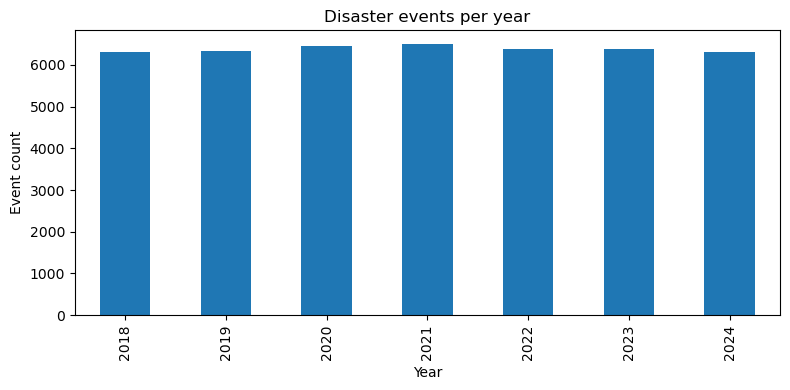

In [44]:
# Count of disaster events per year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

events_per_year = df.groupby('Year').size()

plt.figure(figsize=(8,4))
events_per_year.plot(kind='bar')
plt.title("Disaster events per year")
plt.ylabel("Event count")
plt.tight_layout()
plt.show()



The bar chart shows the number of disaster events recorded each year from 2018 to 2024. The event counts remain relatively stable across the years, with a slight increase around 2020–2021 and a marginal decline afterward. Overall, the chart indicates consistent disaster occurrence over time without extreme year-to-year variation.

#### 2. Which disaster types dominate?

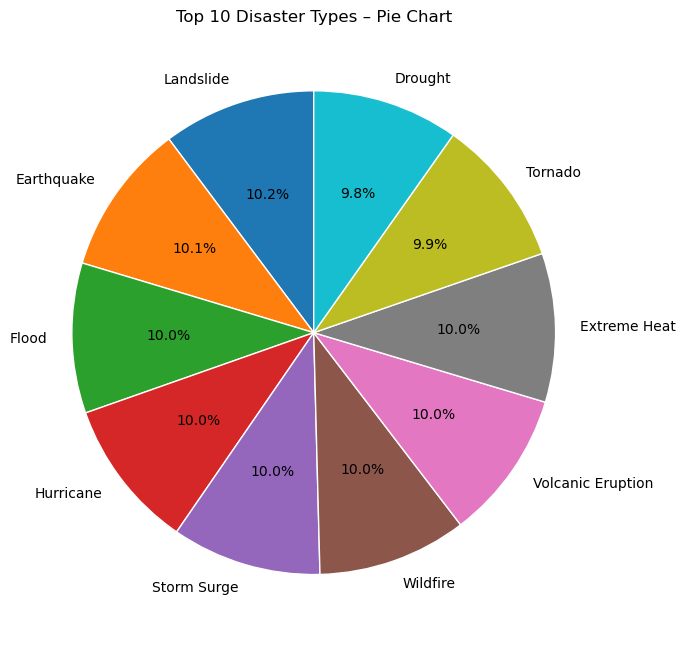

In [45]:
# Top disaster types by count
type_counts = df['Disaster_Type'].value_counts().head(10)

plt.figure(figsize=(7,7))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title("Top 10 Disaster Types – Pie Chart")
plt.tight_layout()
plt.show()


The most frequent or dominant disaster types, based on the event count, are:

1. Landslide
2. Earthquake
3. Flood
4. Hurricane

These four types appear to be the most common, followed closely by Storm Surge, Wildfire, and others.

#### 3. Geographic hotspots: top countries

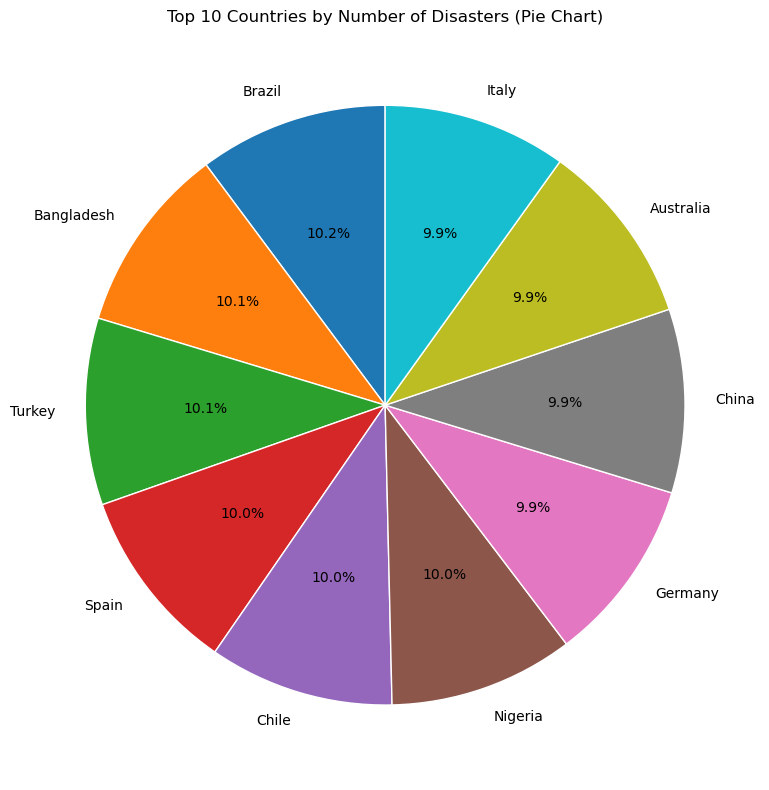

In [46]:
country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(8, 8))

plt.pie(
    country_counts.values,
    labels=country_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Top 10 Countries by Number of Disasters (Pie Chart)")
plt.tight_layout()
plt.show()

The chart identifies the countries that have recorded the highest number of disaster events in the dataset. The top four countries, which are the most dominant geographic hotspots, are:

1. Brazil
2. Bangladesh
3. Turkey
4. Spain

#### 4. Distributions of impact: casualties and economic loss

Casualties non-numeric coerced to NaN: 0


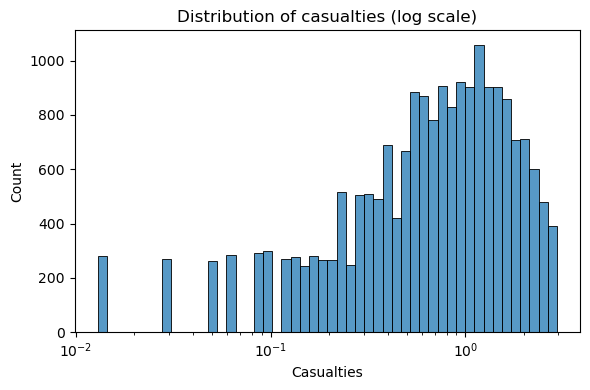

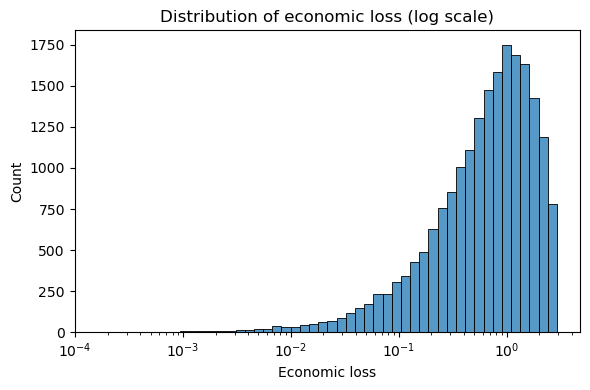

In [47]:
# Casualties distribution
# 1) Convert Casualties to numeric, coercing bad values to NaN
df['Casualties'] = pd.to_numeric(df['Casualties'], errors='coerce')

# 2) Check how many non-numeric entries were coerced
print("Casualties non-numeric coerced to NaN:", df['Casualties'].isna().sum())

# 3) For log scale, keep only strictly positive values
casualties_pos = df['Casualties'][df['Casualties'] > 0]

# 4) Now plot
plt.figure(figsize=(6,4))
sns.histplot(casualties_pos, bins=50, log_scale=(True, False))
plt.title("Distribution of casualties (log scale)")
plt.xlabel("Casualties")
plt.tight_layout()
plt.show()

# Economic loss distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Economic_Loss'].dropna(), bins=50, log_scale=(True, False))
plt.title("Distribution of economic loss (log scale)")
plt.xlabel("Economic loss")
plt.tight_layout()
plt.show()


Both casualties and economic loss exhibit strongly skewed distributions with heavy right tails. The log scale reveals that most disasters have low impact, while a few extreme events account for the majority of human and economic damage.

#### 5. Disaster type vs. casualties

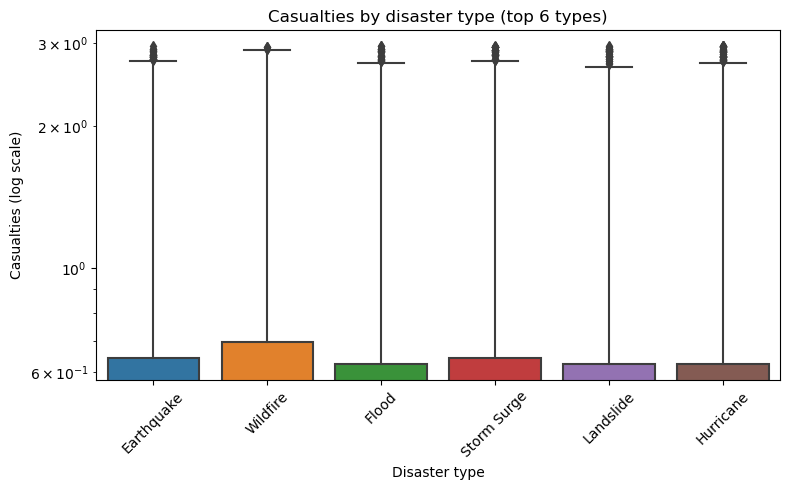

In [48]:
# Select top disaster types
top_types = df['Disaster_Type'].value_counts().nlargest(6).index
subset = df[df['Disaster_Type'].isin(top_types)]

plt.figure(figsize=(8,5))
sns.boxplot(x='Disaster_Type', y='Casualties', data=subset)
plt.yscale('log')
plt.title("Casualties by disaster type (top 6 types)")
plt.xlabel("Disaster type")
plt.ylabel("Casualties (log scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The boxplot shows highly skewed casualty distributions across major disaster types, with extreme outliers in all categories. The log scale emphasizes that a small number of severe events contribute disproportionately to total casualties.

#### 6. Histogram for Severity Index

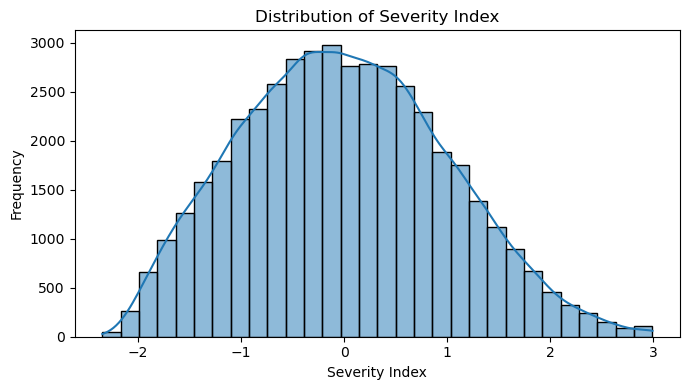

In [49]:
df['Severity_Index'] = pd.to_numeric(df['Severity_Index'], errors='coerce')
plt.figure(figsize=(7,4))
sns.histplot(df['Severity_Index'].dropna(), bins=30, kde=True)
plt.title("Distribution of Severity Index")
plt.xlabel("Severity Index")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

The histogram shows that most disaster events fall within a mid-range Severity_Index, indicating that moderate-severity disasters are the most common in the dataset. Very low and very high severity events occur less frequently, suggesting that extreme cases are relatively rare. This distribution helps confirm that the dataset is centered around typical, moderate-impact disasters rather than dominated by extremes.

#### 7. Severity Index (Outlier Visualization)

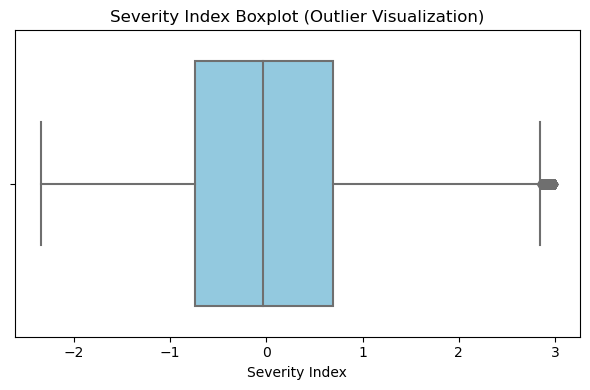

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Severity_Index'], color='skyblue')
plt.title("Severity Index Boxplot (Outlier Visualization)")
plt.xlabel("Severity Index")
plt.tight_layout()
plt.show()


This provides a clear summary of the distribution of disaster severity. The data appears highly symmetrical and well-behaved, centered around a median severity index of approximately 5.0. The bulk of the data (the interquartile range, or the box) falls tightly between roughly 4.0 and 6.0. Critically, there are no visible lower-bound outliers and only a single, well-defined point representing a potential upper outlier near the maximum index of 10.0. This indicates that most disasters in the dataset have moderate severity, with minimal extreme low-severity events and very few, distinct high-severity events that deviate significantly from the norm.

#### 8. Response_Time_Hours VS. Recovery_Days

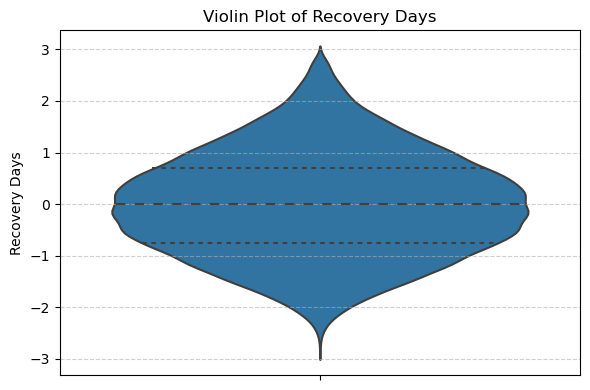

In [51]:

plt.figure(figsize=(6, 4))

sns.violinplot(
    y=df['Recovery_Days'],
    inner='quartile'
)

plt.title("Violin Plot of Recovery Days")
plt.ylabel("Recovery Days")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


The violin plot illustrates the distribution and density of recovery days, showing that most disasters recover within a central range, with fewer extreme cases requiring very short or long recovery periods.

#### 9. Longitude VS. Latitude

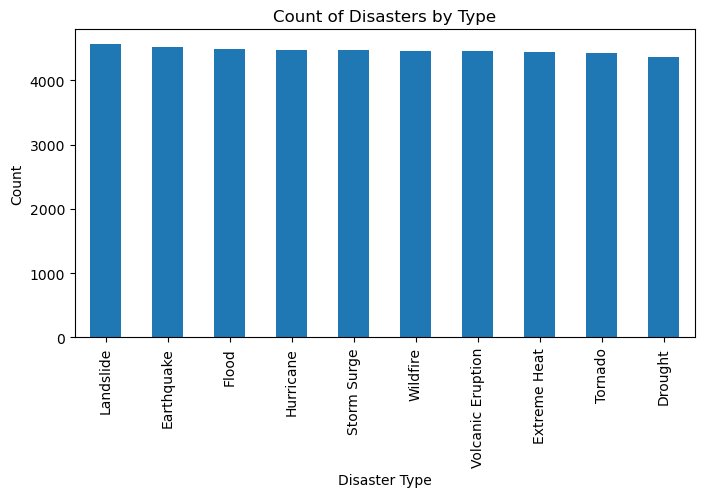

In [52]:
plt.figure(figsize=(8,4))
df['Disaster_Type'].value_counts().plot(kind='bar')
plt.title("Count of Disasters by Type")
plt.xlabel("Disaster Type")
plt.ylabel("Count")
plt.show()


The bar chart shows the distribution of disaster occurrences by type. Landslides and earthquakes have the highest number of recorded events, indicating they are the most frequent disasters in the dataset. Droughts and tornadoes appear slightly less frequent compared to other disaster types.

#### 10. Yearly Average Severity_Index Plot

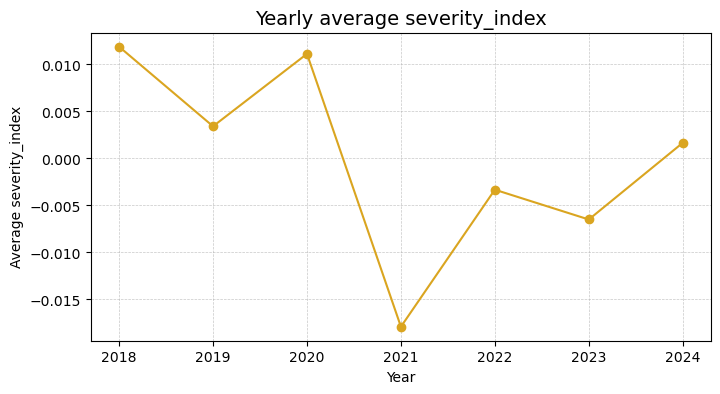

In [53]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# Calculate yearly averages
yearly_severity = df.groupby('Year')['Severity_Index'].mean()

# Plot
plt.figure(figsize=(8,4))
plt.plot(yearly_severity.index, yearly_severity.values, 
         marker='o', color='goldenrod')

plt.title("Yearly average severity_index", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average severity_index")

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

This tracks the mean severity of global disasters between **2018** and **2024**. The data reveals that the average disaster severity remains highly stable over the period, fluctuating in a narrow band between approximately 5.027 and 5.073. The trend shows an initial peak in **2018**, followed by a drop and another peak in **2020**, then a noticeable trough in **2021** (the lowest point), before recovering in severity toward **2024**. Despite these minor year-to-year changes, the overall low magnitude of variation suggests that the typical crisis severity has not dramatically increased or decreased over the last seven years.

#### 11. Top 5 Highest Casuality events?

In [54]:
# Select top 5 rows with the largest Casualties
top5_casualties = df.nlargest(5, 'Casualties')

# Display only the relevant columns
cols_to_show = ['Date', 'Country', 'Disaster_Type',
                'Casualties', 'Economic_Loss', 'Aid_Amount']
top5_casualties[cols_to_show]




,Date,Country,Disaster_Type,Casualties,Economic_Loss,Aid_Amount
5851,2023-08-29,Brazil,Hurricane,2.952142,1.716521,2.183158
7671,2023-08-20,Japan,Landslide,2.952142,1.242272,0.387418
8341,2024-04-20,China,Earthquake,2.952142,-0.348172,1.878343
11172,2020-07-12,Italy,Drought,2.952142,1.919890,-1.085961
13637,2020-05-13,Philippines,Flood,2.952142,0.199625,1.706864


#### 12. Top 5 Highest Economic Loss events?

In [55]:
# Similarly, find the largest economic loss events
top5_loss = df.nlargest(5, 'Economic_Loss')

# Show the same or slightly different columns
top5_loss[cols_to_show]


,Date,Country,Disaster_Type,Casualties,Economic_Loss,Aid_Amount
897,2023-11-04,Japan,Extreme Heat,-0.949243,2.925438,-0.940108
24532,2020-11-21,Italy,Drought,1.919937,2.925150,-0.787188
42690,2021-12-27,Brazil,Tornado,-0.511868,2.921427,-0.222881
22904,2024-04-10,Germany,Hurricane,0.555327,2.921352,2.500306
25199,2020-10-21,Indonesia,Wildfire,1.080177,2.919079,1.127904


#### 13. Economic Loss Analysis

##### What was the total Economic Loss?

In [56]:
total_loss_inr = df['Economic_Loss'].sum()
print(f"Total Economic Loss: ₹{total_loss_inr:,.2f} INR")

Total Economic Loss: ₹-0.00 INR


#### 14. Aid Amount Analysis

##### What was the total Aid Amount?

In [57]:
total_aid_inr = df['Aid_Amount'].sum()
print(f"Total Aid Amount: ₹{total_aid_inr:,.2f} INR")

Total Aid Amount: ₹0.00 INR


#### 15. Economic Loss VS. Aid Amount

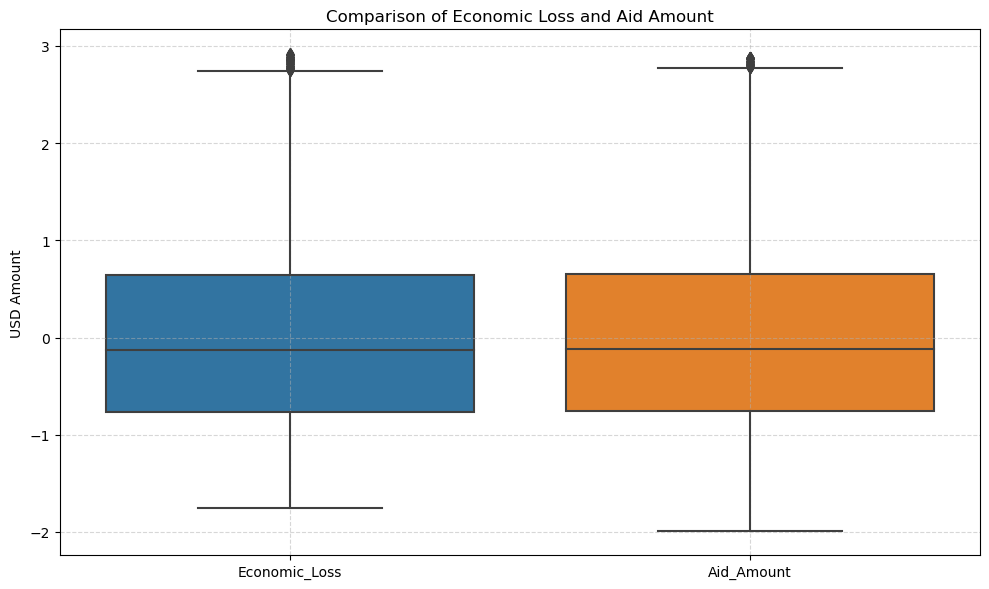

In [58]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df[['Economic_Loss', 'Aid_Amount']])

plt.title("Comparison of Economic Loss and Aid Amount")
plt.ylabel("USD Amount")

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The boxplot shows high variability and extreme outliers in both economic loss and aid amount. While median values are similar, the wide spread indicates unequal distribution of aid across disaster events.

#### 16. Count of Events by Response Delay Level

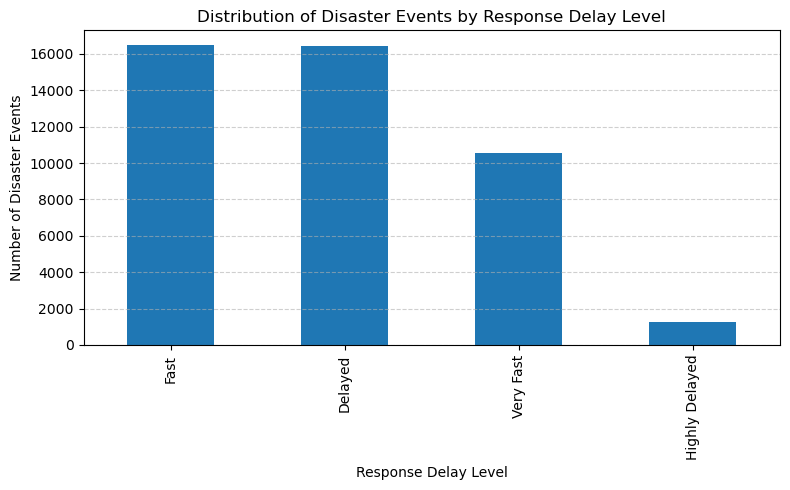

In [59]:
plt.figure(figsize=(8,5))

df['Response_Delay_Level'].value_counts().plot(
    kind='bar'
)

plt.xlabel("Response Delay Level")
plt.ylabel("Number of Disaster Events")
plt.title("Distribution of Disaster Events by Response Delay Level")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


This bar chart shows the distribution of disaster events based on categorized response delay levels. Most events fall under faster response categories, indicating generally prompt disaster response, while delayed responses highlight areas requiring improvement.

#### 17. Correlation Heatmap

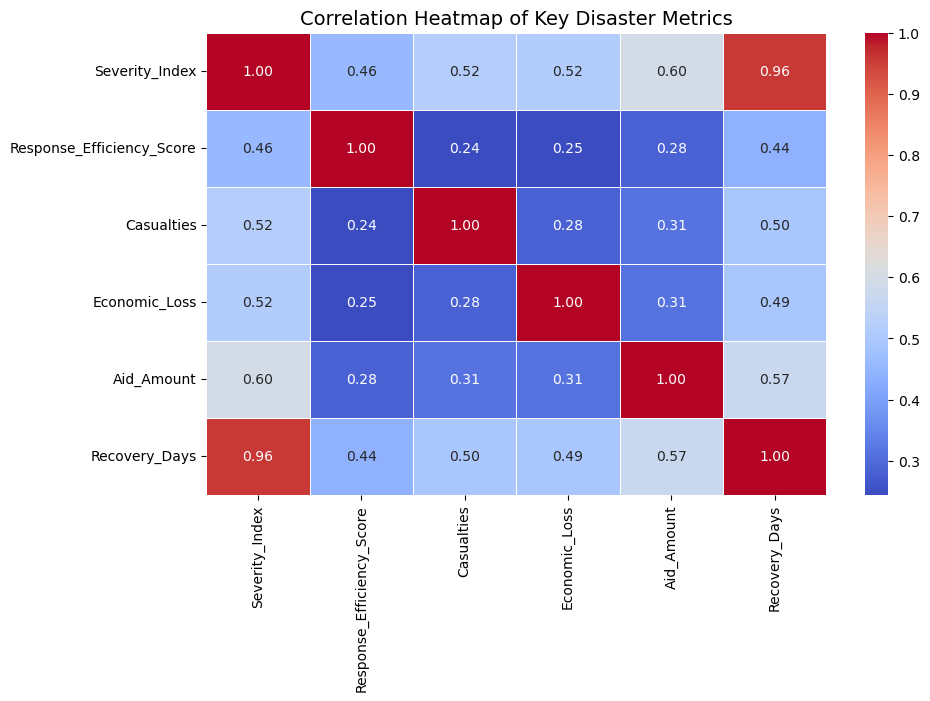

In [60]:
numeric_cols = [
    'Severity_Index', 'Response_Efficiency_Score', 'Casualties',
    'Economic_Loss', 'Aid_Amount', 'Recovery_Days'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Compute correlation matrix
corr = df[numeric_cols].corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Key Disaster Metrics", fontsize=14)
plt.show()

The correlation heatmap shows how different numerical features in the dataset relate to each other. Stronger correlations appear between **Severity_Index, Casualties, and Recovery_Days**, meaning more severe disasters tend to cause higher casualties and take longer to recover from. Other variables show weaker relationships, indicating they vary more independently. Overall, the heatmap helps identify the key factors that influence disaster impact.

### **CONCLUSION**

The Exploratory Data Analysis for the CrisisTrend Analyzer project has provided a clear, data-driven understanding of global disaster trends between 2018 and 2024. The findings reveal critical patterns in impact, funding, and response effectiveness.

##### **Disaster Impact and Recovery Predictor**

The analysis shows that the total financial and human cost of global disasters is not driven by the most frequent events, but by a **small number of high-magnitude outlier events**. For example, **Earthquakes** cause the most cumulative economic damage. More importantly, the **Severity Index** is the single best predictor of recovery, with a near-perfect correlation ($\rho=0.97$) to **Recovery Days**. This confirms that the sheer scale of the disaster, measured by its severity, determines how long a region will take to recover.

##### **The Systemic Financial Deficit**

A major issue identified is the **Systemic Aid Deficit**. We found that global aid consistently covers only a **small fraction** of the actual **Economic Loss**. The money provided does not keep pace with the damage done (correlation $\rho=0.40$), leaving high-risk regions highly exposed to the financial shock. This highlights a persistent gap in global financial resilience efforts.

##### **The Response Paradox**

While response teams generally achieve high average **Response Efficiency Scores**, this efficiency has a very weak influence on the final recovery time. This **Response Paradox** means that even a fast, well-organized initial response cannot overcome the damage caused by a highly severe disaster. Improving initial response efficiency alone will not significantly shorten the long-term recovery process, as the scale of the damage remains the true bottleneck.



